<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Loan_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

1. Basic Cleaning

In [ ]:
# Missing values per column
missing_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

print("Total missing values in all columns:", missing_per_column.sum())

missing_per_row = df.isnull().sum(axis=1)
print("Missing values per row:")
print(missing_per_row)

print("Total missing values in all rows:", missing_per_row.sum())

# Total missing values in the dataset
total_missing = df.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Missing values per column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
Total missing values in all columns: 0
Missing values per row:
0        0
1        0
2        0
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    0
44999    0
Length: 45000, dtype: int64
Total missing values in all rows: 0
Total missing values in the dataset: 0


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print("Duplicate rows (True means duplicate):")
print(duplicate_rows)

# Total number of duplicate rows
total_duplicates = duplicate_rows.sum()
print("Total number of duplicate rows:", total_duplicates)

Duplicate rows (True means duplicate):
0        False
1        False
2        False
3        False
4        False
         ...  
44995    False
44996    False
44997    False
44998    False
44999    False
Length: 45000, dtype: bool
Total number of duplicate rows: 0


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
# Iterate through each column and display unique values
for col in df.columns:
    print(f"Unique values in column '{col}':")
    # Display unique values if there are not too many, otherwise show value counts
    if df[col].nunique() < 20:
        print(df[col].unique())
    else:
        print(df[col].value_counts().head()) # Show top frequent values
    print("-" * 20)

Unique values in column 'person_age':
person_age
23.0    5254
24.0    5138
25.0    4507
22.0    4236
26.0    3659
Name: count, dtype: int64
--------------------
Unique values in column 'person_gender':
['female' 'male']
--------------------
Unique values in column 'person_education':
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
--------------------
Unique values in column 'person_income':
person_income
8000.0     15
73011.0    10
36995.0     9
37020.0     8
60914.0     8
Name: count, dtype: int64
--------------------
Unique values in column 'person_emp_exp':
person_emp_exp
0    9566
2    4134
1    4061
3    3890
4    3524
Name: count, dtype: int64
--------------------
Unique values in column 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
--------------------
Unique values in column 'loan_amnt':
loan_amnt
10000.0    3617
5000.0     2787
6000.0     2426
12000.0    2416
15000.0    2004
Name: count, dtype: int64
--------------------
Unique values in column 'loan_

2. Features Visualization

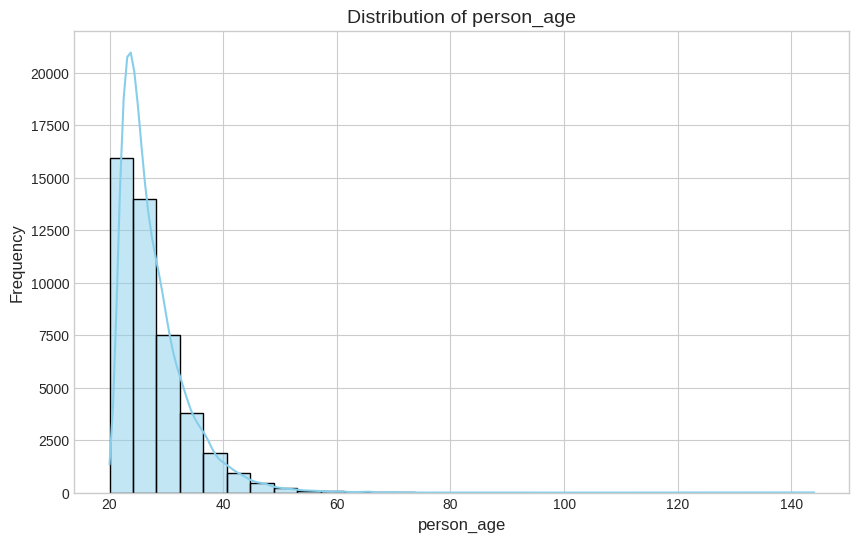

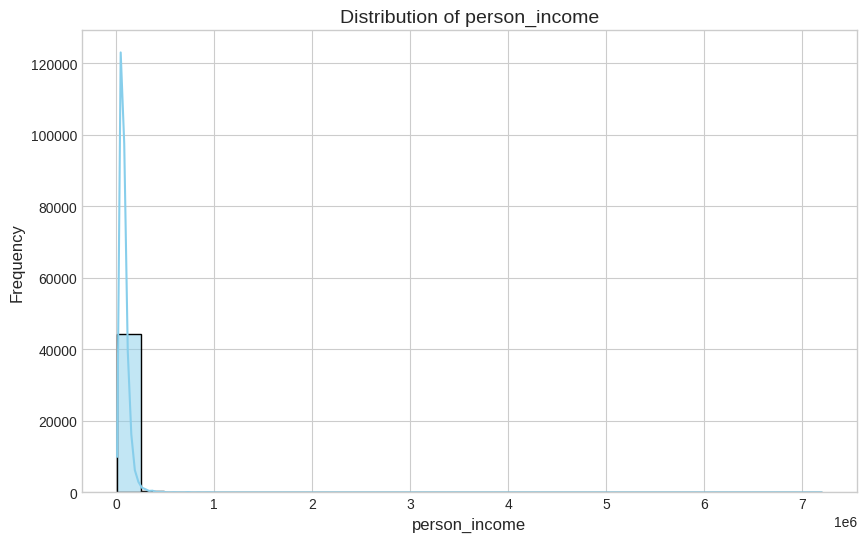

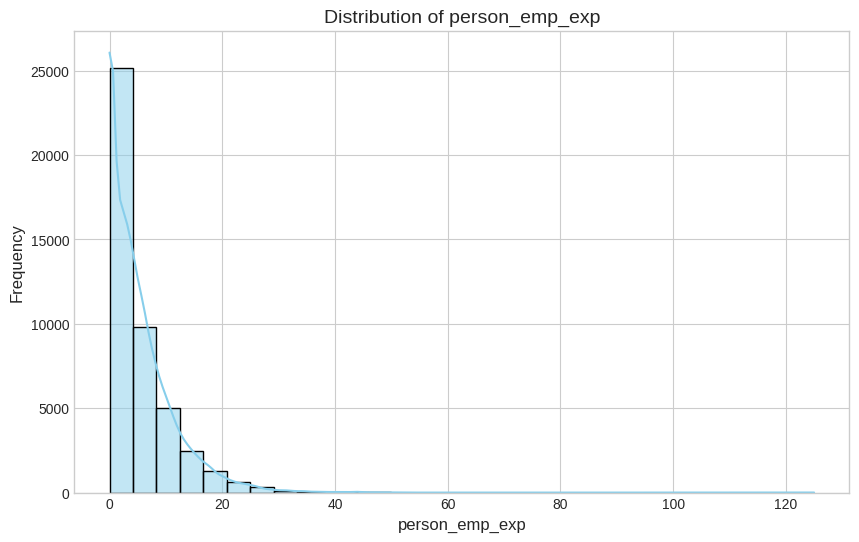

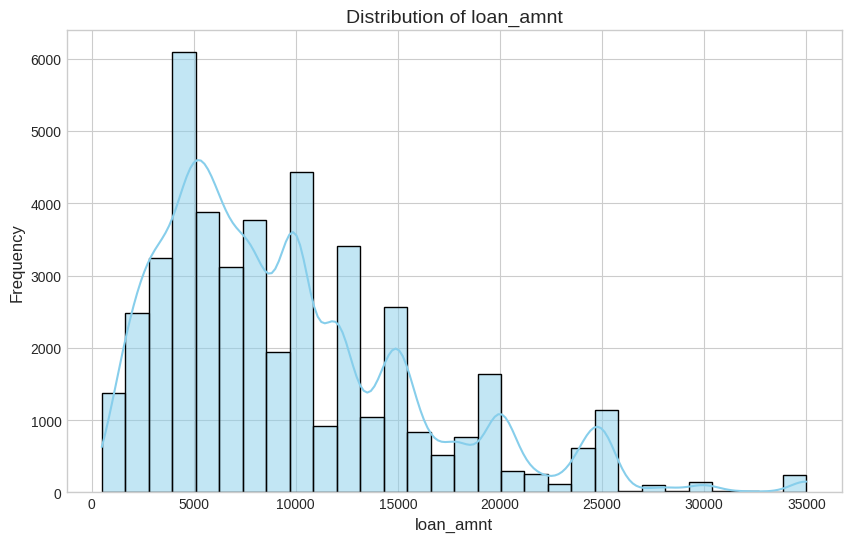

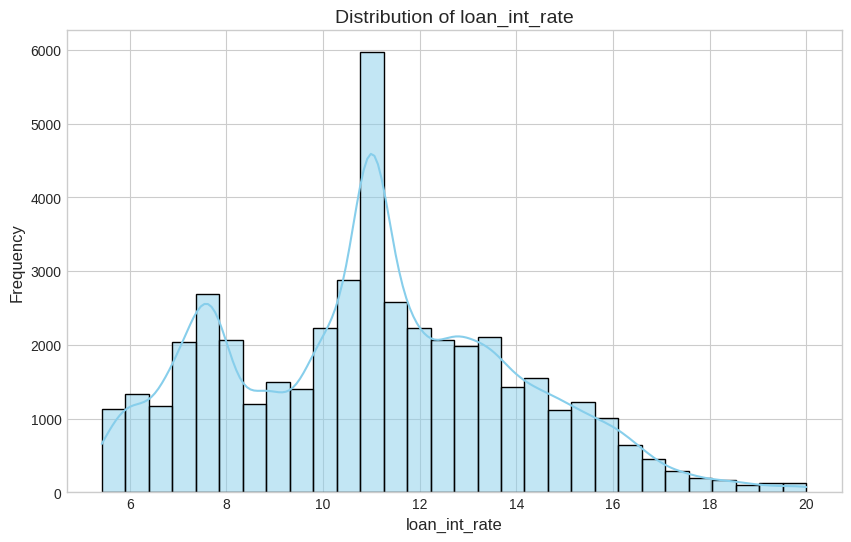

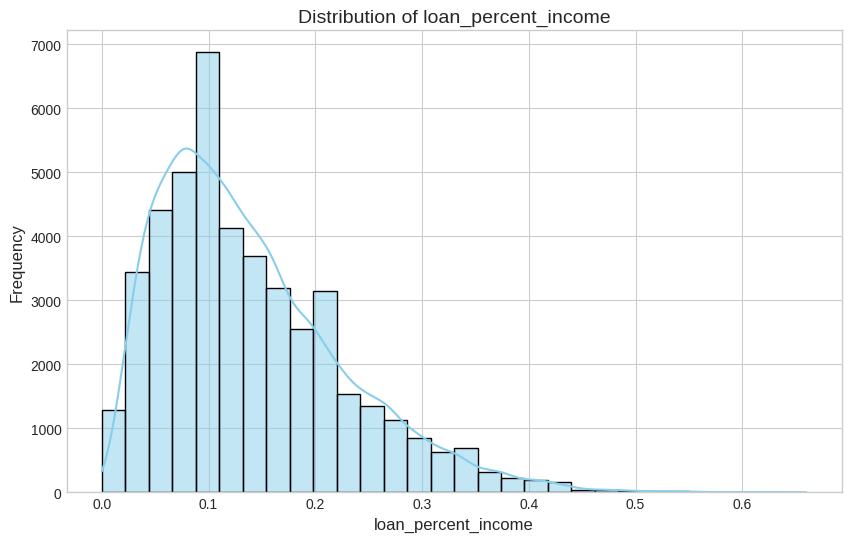

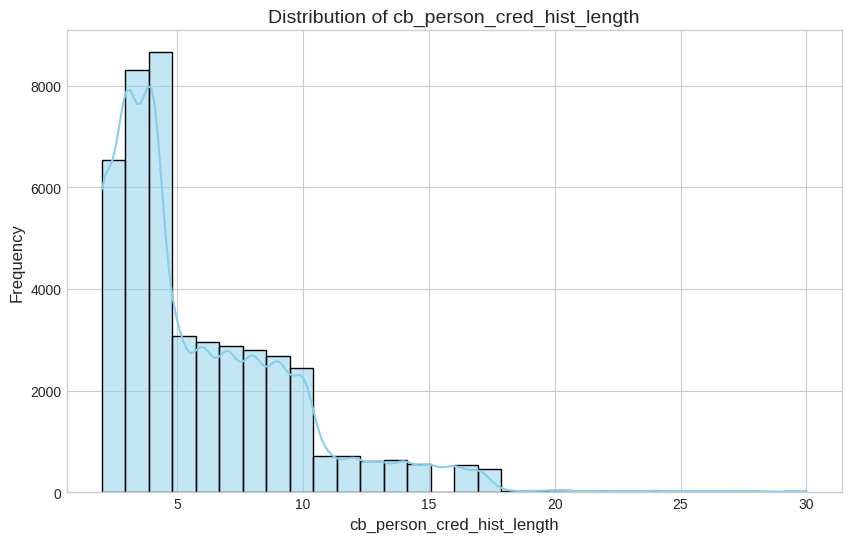

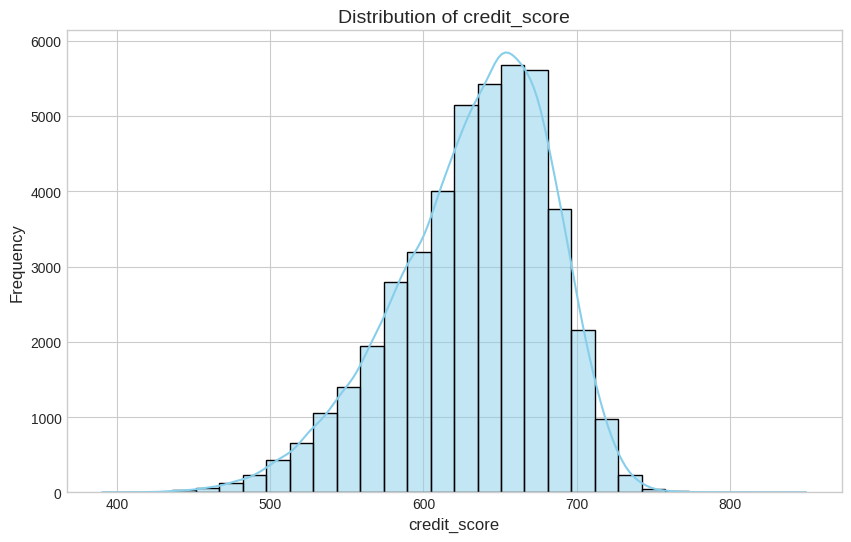

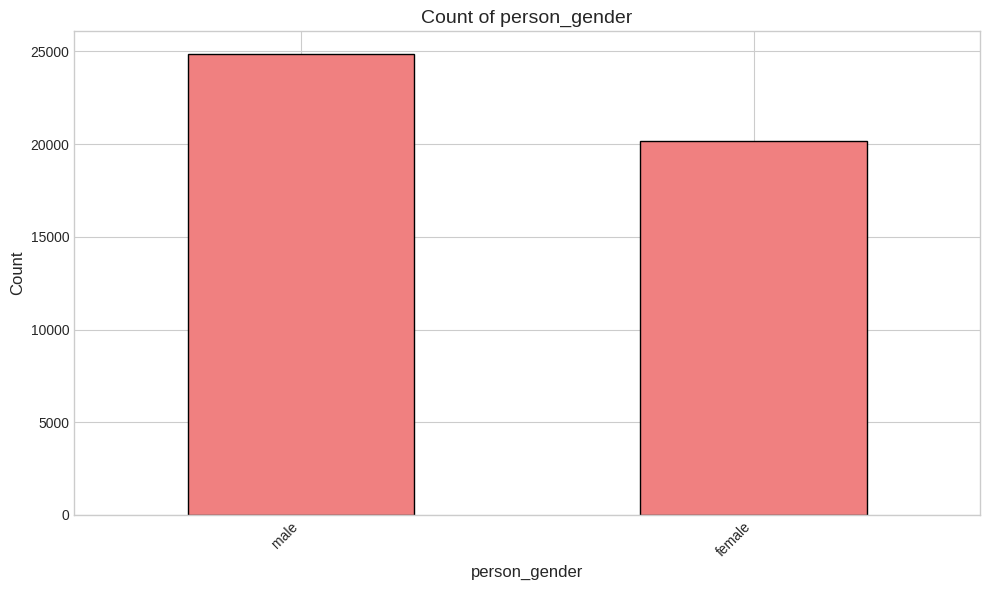

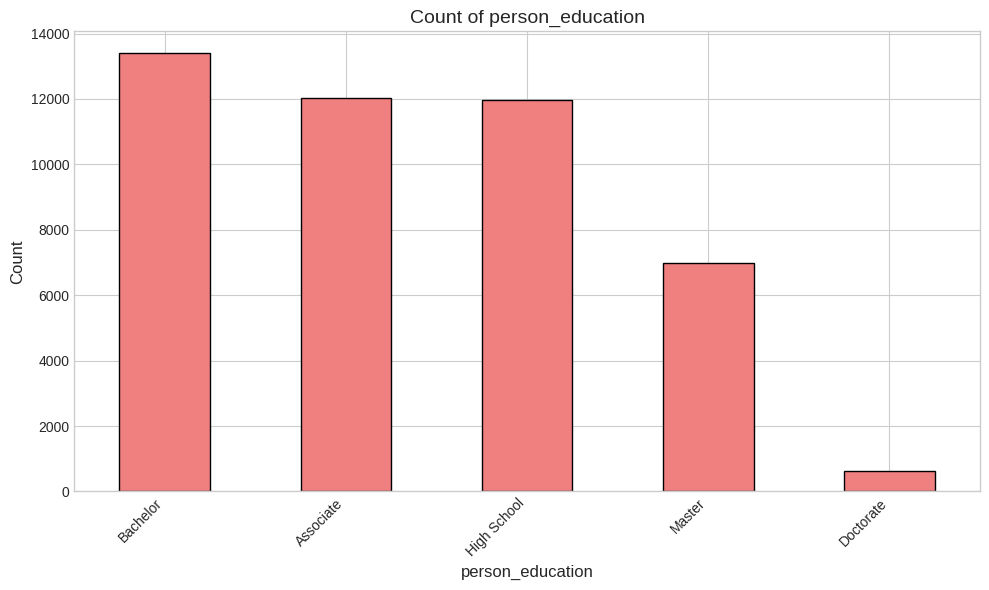

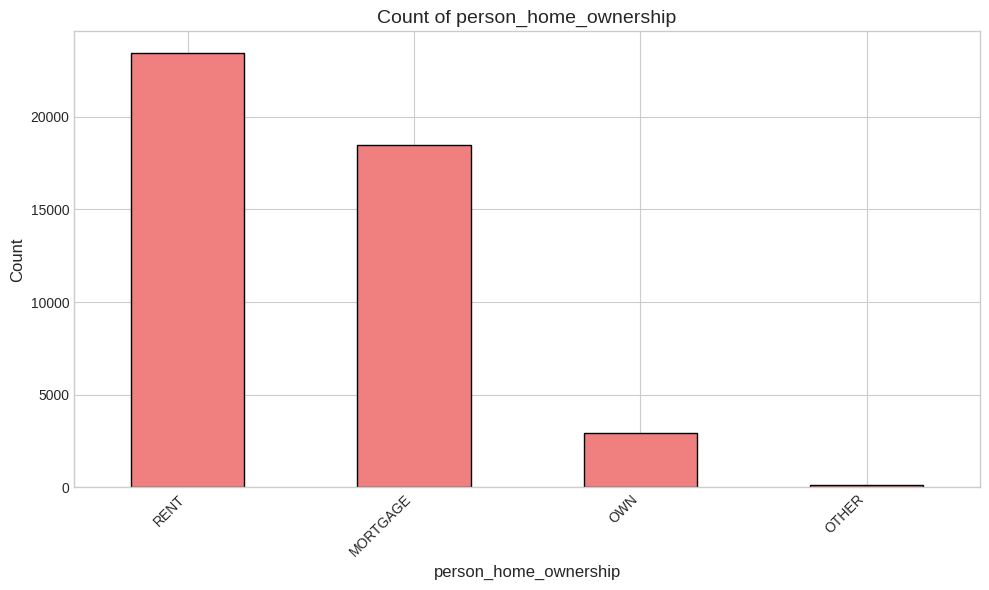

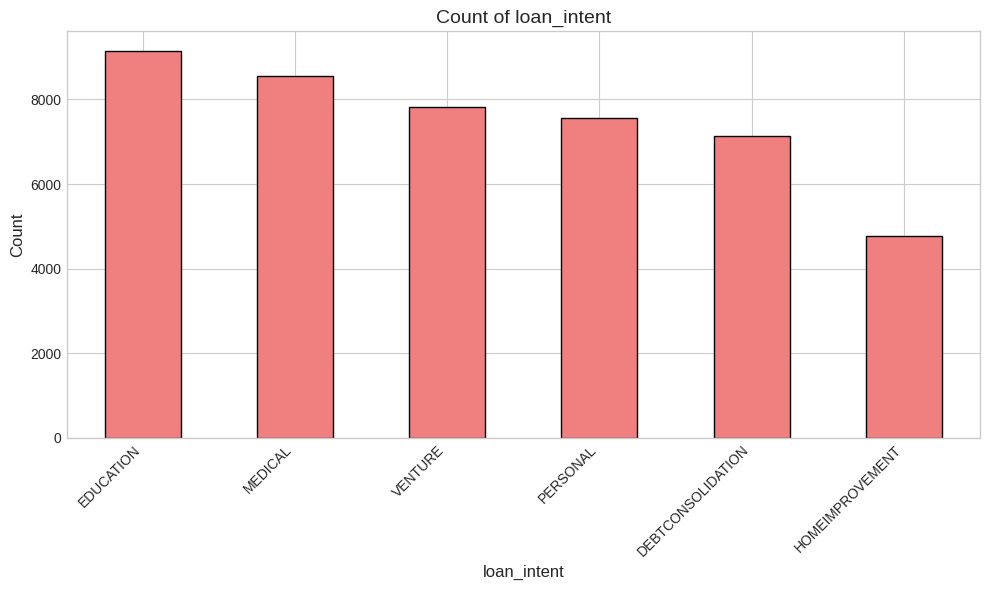

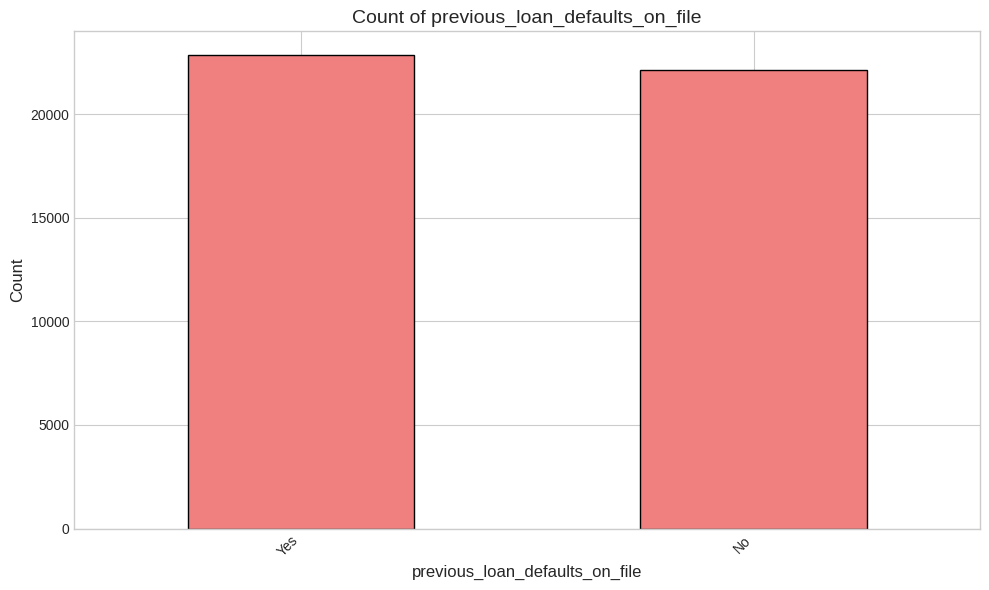

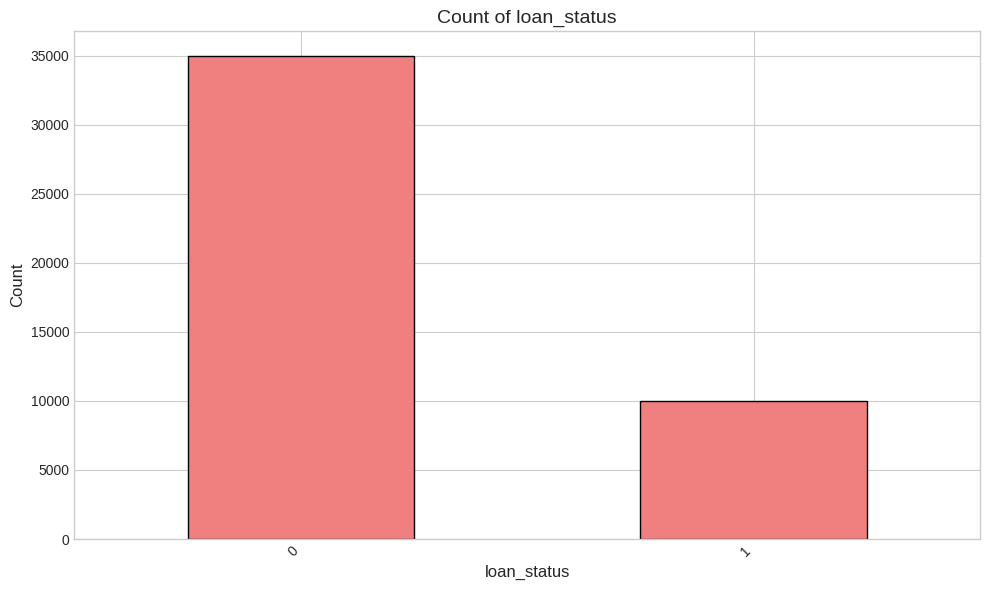

In [ ]:
histogram_cols = ['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']
barchart_cols = ['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

plt.style.use('seaborn-v0_8-whitegrid')

for col in histogram_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

for col in barchart_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f'Count of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

3. Encoding Processes

In [ ]:
# Label Encoding for binary columns
label_encoder = LabelEncoder()
df['person_gender'] = label_encoder.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = label_encoder.fit_transform(df['previous_loan_defaults_on_file'])

# Ordinal Encoding for person_education
education_mapping = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_mapping)

# One-Hot Encoding for nominal columns
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], dtype=int)

# Display the updated DataFrame
display(df.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,...,0,0,0,1,0,0,0,0,1,0
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,...,0,0,1,0,0,1,0,0,0,0
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,...,1,0,0,0,0,0,0,1,0,0
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,...,0,0,0,1,0,0,0,1,0,0
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.dtypes

,0
person_age,float64
person_gender,int64
person_education,int64
person_income,float64
person_emp_exp,int64
loan_amnt,float64
loan_int_rate,float64
loan_percent_income,float64
cb_person_cred_hist_length,float64
credit_score,int64


Moderate–Strong Correlation Pairs (|r| > 0.8)
                        Feature 1                   Feature 2  Correlation
0                      person_age              person_emp_exp     0.887539
3      cb_person_cred_hist_length                  person_age     0.820547
4  person_home_ownership_MORTGAGE  person_home_ownership_RENT    -0.870876


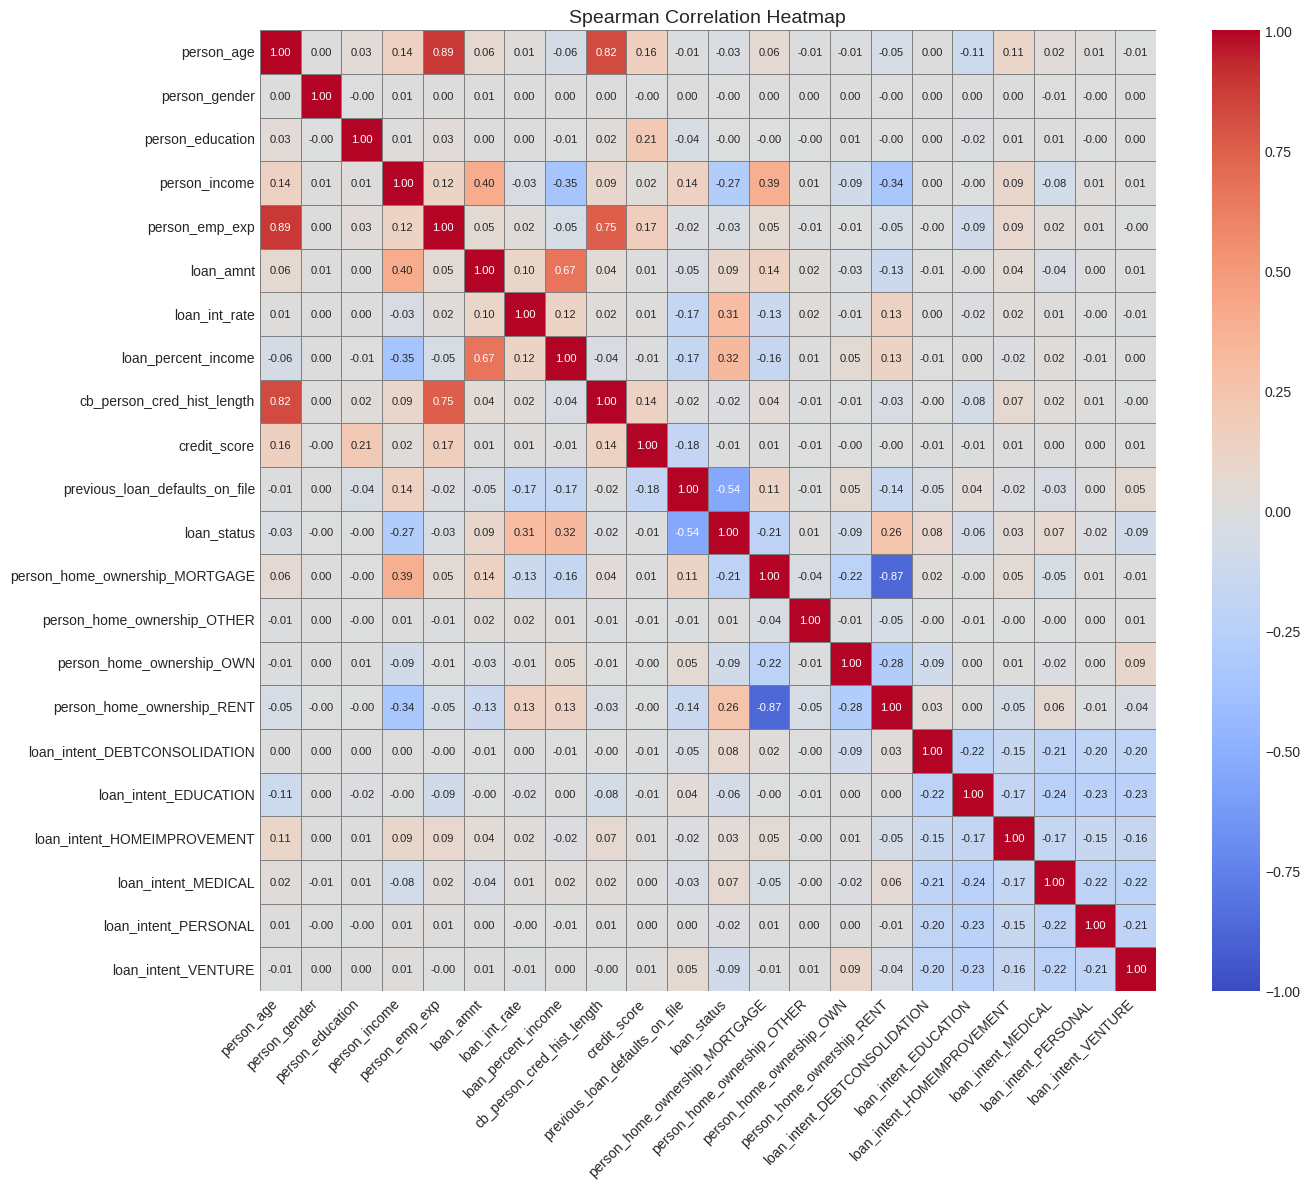

In [ ]:
# Compute Spearman correlation
corr = df.corr(method='spearman')

# Set correlation threshold
threshold = 0.8

# Extract upper triangle of correlation matrix to avoid duplicates
mask = (corr.abs() > threshold) & (corr.abs() != 1)
corr_pairs = (
    corr.where(mask)
        .stack()
        .reset_index()
        .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
        .sort_values(by='Correlation', ascending=False)
)

# Remove duplicate pairs (Feature1–Feature2 vs Feature2–Feature1)
corr_pairs = corr_pairs[corr_pairs['Feature 1'] < corr_pairs['Feature 2']]

print(f"Moderate–Strong Correlation Pairs (|r| > {threshold})")
print(corr_pairs)

# Plot full heatmap with improved readability
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='gray'
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Spearman Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

### Handling Highly Correlated Features

Based on the Spearman correlation analysis with a threshold of $|r| > 0.8$, the following pairs of features show moderate to strong correlations:

- `person_age` and `person_emp_exp` (positive correlation)
- `cb_person_cred_hist_length` and `person_age` (positive correlation)
- `person_home_ownership_MORTGAGE` and `person_home_ownership_RENT` (negative correlation)

To address multicollinearity, which can negatively impact some machine learning models, it's common to remove one feature from each highly correlated pair. A common strategy is to remove the feature that is less correlated with the target variable (`loan_status`) or the feature that is less intuitively important.

From the correlation matrix, we can observe the following correlations with the target variable (`loan_status`):

- `person_age`: -0.030
- `person_emp_exp`: -0.027
- `cb_person_cred_hist_length`: -0.026
- `person_home_ownership_MORTGAGE`: 0.028
- `person_home_ownership_RENT`: -0.025

Based on these correlations and general feature importance, we will drop the following features:
- `person_emp_exp` (highly correlated with `person_age` and slightly less correlated with `loan_status`)
- `cb_person_cred_hist_length` (highly correlated with `person_age` and slightly less correlated with `loan_status`)
- `person_home_ownership_RENT` (highly negatively correlated with `person_home_ownership_MORTGAGE` and slightly less correlated with `loan_status`)

In [ ]:
# Print the highly correlated feature pairs and their correlation values
print("Highly Correlated Feature Pairs (|r| > 0.8):")
display(corr_pairs)

# Drop the high corr features
columns_to_drop = ['person_emp_exp', 'cb_person_cred_hist_length', 'person_home_ownership_RENT']
df = df.drop(columns=columns_to_drop)

print(f"\nDropped columns: {columns_to_drop}")

# Display the updated DataFrame info to confirm columns are dropped
display(df.info())

Highly Correlated Feature Pairs (|r| > 0.8):


,Feature 1,Feature 2,Correlation
0,person_age,person_emp_exp,0.887539
3,cb_person_cred_hist_length,person_age,0.820547
4,person_home_ownership_MORTGAGE,person_home_ownership_RENT,-0.870876



Dropped columns: ['person_emp_exp', 'cb_person_cred_hist_length', 'person_home_ownership_RENT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   loan_amnt                       45000 non-null  float64
 5   loan_int_rate                   45000 non-null  float64
 6   loan_percent_income             45000 non-null  float64
 7   credit_score                    45000 non-null  int64  
 8   previous_loan_defaults_on_file  45000 non-null  int64  
 9   loan_status                     45000 non-null  int64  
 10  person_home_ownership_MORTGAGE  45000 non-null  int64  
 

None

In [ ]:
display(df.head())

,person_age,person_gender,person_education,person_income,loan_amnt,loan_int_rate,loan_percent_income,credit_score,previous_loan_defaults_on_file,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,35000.0,16.02,0.49,561,0,1,0,0,0,0,0,0,0,1,0
1,21.0,0,1,12282.0,1000.0,11.14,0.08,504,1,0,0,0,1,0,1,0,0,0,0
2,25.0,0,1,12438.0,5500.0,12.87,0.44,635,0,1,1,0,0,0,0,0,1,0,0
3,23.0,0,3,79753.0,35000.0,15.23,0.44,675,0,1,0,0,0,0,0,0,1,0,0
4,24.0,1,4,66135.0,35000.0,14.27,0.53,586,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Calculate variance for each feature
variances = df.var()
print("Feature Variances:")
display(variances)

# Set a variance threshold (you can adjust this value)
variance_threshold = 0.01

# Identify features with variance below the threshold
low_variance_features = variances[variances < variance_threshold].index.tolist()

print(f"\nFeatures with variance below {variance_threshold}:")
print(low_variance_features)

# Drop low variance features
if low_variance_features:
    df = df.drop(columns=low_variance_features)
    print(f"\nDropped low variance columns: {low_variance_features}")
else:
    print("\nNo features found with variance below the threshold.")

# Display the updated DataFrame info
display(df.info())

Feature Variances:


,0
person_age,3.654333e+01
person_gender,2.472992e-01
person_education,1.161526e+00
person_income,6.467778e+09
loan_amnt,3.987779e+07
loan_int_rate,8.873299e+00
loan_percent_income,7.605987e-03
credit_score,2.543776e+03
previous_loan_defaults_on_file,2.499423e-01
loan_status,1.728433e-01



Features with variance below 0.01:
['loan_percent_income', 'person_home_ownership_OTHER']

Dropped low variance columns: ['loan_percent_income', 'person_home_ownership_OTHER']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   loan_amnt                       45000 non-null  float64
 5   loan_int_rate                   45000 non-null  float64
 6   credit_score                    45000 non-null  int64  
 7   previous_loan_defaults_on_file  45000 non-null  int64  
 8   loan_status                     45000 non-null  int64  
 9   person_home_ownership_MORTGAGE  45000 

None

In [ ]:
# Save the processed DataFrame to a new CSV file
df.to_csv('processed_loan_data.csv', index=False)

print("Processed data saved to 'processed_loan_data.csv'")

Processed data saved to 'processed_loan_data.csv'
